In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
test_local_zip = "/content/Dataset.zip"

zip_ref = zipfile.ZipFile(test_local_zip, 'r')
zip_ref.extractall('/tmp/training')

val_local_zip = "/content/Dataset.zip"
zip_ref = zipfile.ZipFile(val_local_zip, 'r')
zip_ref.extractall('/tmp/validation')

zip_ref.close()

In [ ]:
# resize train
path_train_Good = "/tmp/training/Good"
path_train_Moderate = "/tmp/training/Moderate"
path_train_Dangerous = "/tmp/training/Dangerous"

for i in os.listdir(path_train_Good):
  im = Image.open(path_train_Good + "/" + i)
  im = im.convert('RGB')
  im = im.resize((300,300))
  im.save(path_train_Good + "/" + i)

for j in os.listdir(path_train_Moderate):
  im = Image.open(path_train_Moderate + "/" + j)
  im = im.convert('RGB')
  im = im.resize((300,300))
  im.save(path_train_Moderate + "/" + j)

for k in os.listdir(path_train_Dangerous):
  im = Image.open(path_train_Dangerous + "/" + k)
  im = im.convert('RGB')
  im = im.resize((300,300))
  im.save(path_train_Dangerous + "/" + k)

In [ ]:
# resize validation
path_validation_Good = "/tmp/validation/Good"
path_validation_Moderate = "/tmp/validation/Moderate"
path_validation_Dangerous = "/tmp/validation/Dangerous"

for a in os.listdir(path_validation_Good):
  im = Image.open(path_validation_Good + "/" +a)
  im = im.convert('RGB')
  im = im.resize((300,300))
  im.save(path_validation_Good + "/" + a)

for b in os.listdir(path_validation_Moderate):
  im = Image.open(path_validation_Moderate + "/" + b)
  im = im.convert('RGB')
  im = im.resize((300,300))
  im.save(path_validation_Moderate + "/" + b)

for c in os.listdir(path_validation_Dangerous):
  im = Image.open(path_validation_Dangerous + "/" + c)
  im = im.convert('RGB')
  im = im.resize((300,300))
  im.save(path_validation_Dangerous + "/" + c)

In [ ]:
# Define the training and validation base directories
train_dir = '/tmp/training'
validation_dir = '/tmp/validation'

# Directory with training Good pictures
train_Good_dir = os.path.join(train_dir, 'Good')
# Directory with training Moderate pictures
train_Moderate_dir = os.path.join(train_dir, 'Moderate')
# Directory with training Dangerous pictures
train_Dangerous_dir = os.path.join(train_dir, 'Dangerous')

# Directory with validation Good pictures
validation_Good_dir = os.path.join(validation_dir, 'Good')
# Directory with validation Moderate pictures
validation_Moderate_dir = os.path.join(validation_dir, 'Moderate')
# Directory with validation Dangerous pictures
validation_Dangerous_dir = os.path.join(validation_dir, 'Dangerous')

# Check the number of images for each class and set
print(f"There are {len(os.listdir(train_Good_dir))} images of Good for training.\n")
print(f"There are {len(os.listdir(train_Moderate_dir))} images of Moderate for training.\n")
print(f"There are {len(os.listdir(train_Dangerous_dir))} images of Dangerous for training.\n")
print(f"There are {len(os.listdir(validation_Good_dir))} images of Good for validation.\n")
print(f"There are {len(os.listdir(validation_Moderate_dir))} images of Moderate for validation.\n")
print(f"There are {len(os.listdir(validation_Dangerous_dir))} images of Dangerous for validation.\n")

There are 390 images of Good for training.

There are 176 images of Moderate for training.

There are 35 images of Dangerous for training.

There are 390 images of Good for validation.

There are 176 images of Moderate for validation.

There are 35 images of Dangerous for validation.



Sample Good image:


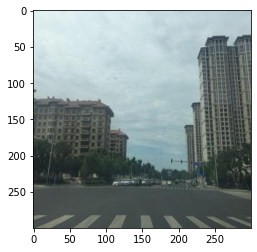

Sample Moderate image:


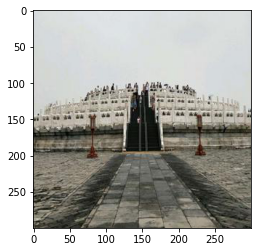

Sample Dangerous image:


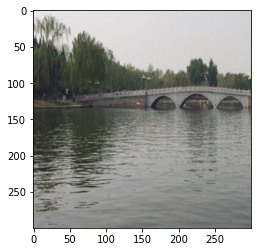

In [ ]:
print("Sample Good image:")
plt.imshow(load_img(f"{os.path.join(train_Good_dir, os.listdir(train_Good_dir)[0])}"))
plt.show()

print("Sample Moderate image:")
plt.imshow(load_img(f"{os.path.join(train_Moderate_dir, os.listdir(train_Moderate_dir)[0])}"))
plt.show()

print("Sample Dangerous image:")
plt.imshow(load_img(f"{os.path.join(train_Dangerous_dir, os.listdir(train_Dangerous_dir)[0])}"))
plt.show()

In [ ]:
# Load the first example of a Good
sample_image  = load_img(f"{os.path.join(train_Good_dir, os.listdir(train_Good_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (300, 300, 3)
